In [124]:
#Importing required python libraries

import pandas as pd
import numpy as np

#Reading the data set

df = pd.read_csv(r"C:\Users\sumuk\Desktop\Happymonk AI Task\MultiLayerPerceptron-master\MultiLayerPerceptron-master\data.csv")

df.head()

,700,1500,2600,1
0,550,1550,2400,1
1,700,1500,2600,1
2,700,1600,2700,1
3,550,1600,2600,1
4,600,1250,2700,1


In [125]:
#To print summary of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   700     870 non-null    int64
 1   1500    870 non-null    int64
 2   2600    870 non-null    int64
 3   1       870 non-null    int64
dtypes: int64(4)
memory usage: 27.3 KB


In [126]:
#Data exploration

df.describe()

,700,1500,2600,1
count,870.000000,870.000000,870.000000,870.000000
mean,470.218391,1514.701149,2560.977011,4.004598
std,129.061668,507.872967,244.678859,1.552303
min,250.000000,700.000000,1800.000000,1.000000
25%,350.000000,1050.000000,2360.000000,3.000000
50%,450.000000,1325.000000,2600.000000,4.000000
75%,550.000000,2000.000000,2700.000000,5.000000
max,900.000000,2550.000000,3200.000000,6.000000


In [127]:
#To print number of rows and columns in the dataset

print('The number of rows in dataset is - ' , df.shape[0])
print('The number of columns in dataset is - ' , df.shape[1])

The number of rows in dataset is -  870
The number of columns in dataset is -  4


In [128]:
#To Check out the missing values in the dataset

df.isnull().sum()

700     0
1500    0
2600    0
1       0
dtype: int64

In [129]:
#To check correlation of dataset

df.corr()

,700,1500,2600,1
700,1.000000,-0.181251,-0.350690,-0.202707
1500,-0.181251,1.000000,0.555327,-0.220712
2600,-0.350690,0.555327,1.000000,0.082852
1,-0.202707,-0.220712,0.082852,1.000000


<AxesSubplot:>

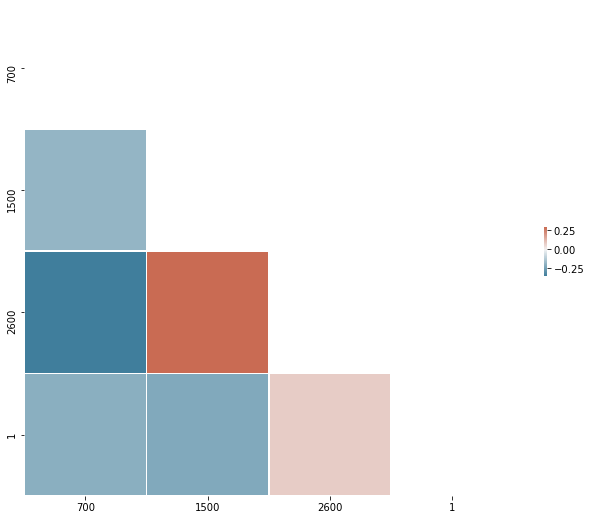

In [130]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .1})

**OBSERVATIONS:

1.) Correlation co-efficients have been plotted using a heatmap representation.
2.) The colour scheme defines the range of values.

In [131]:
#Data Preprocessing

x = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

In [132]:
# To display the contents of X array
x

array([], shape=(870, 0), dtype=float64)

In [133]:
# To display the contents of Y array
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [134]:
#Splitting the dataset into train set and test set respectively

from sklearn.model_selection import train_test_split

#75% of the data is used for training the model and the rest is used for testing it
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 0)

In [135]:
# Importing Regularizers to add a penalty for weight size to the loss function and avoiding overfitting

from keras.regularizers import l2

In [136]:
import tensorflow as tf

#Initializing the ANN
ann = tf.keras.models.Sequential()

In [137]:
# Adding the input layer and the first hidden layer

ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))

In [138]:
# Adding first Dropout layer

tf.keras.layers.Dropout(0.6)

In [139]:
# Adding the second hidden layer

ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))

In [140]:
# Adding second Dropout layer

tf.keras.layers.Dropout(0.6)

In [141]:
# Adding the output layer

ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))

In [142]:
# Training the ANN

ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [143]:
# Fitting the ANN model

ann_history = ann.fit(x_train, y_train, batch_size= 32, epochs= 100, validation_split= 0.3)

Epoch 1/100
15/15 [==============================] - 2s 37ms/step - loss: 0.7637 - accuracy: 0.0748 - val_loss: 0.7212 - val_accuracy: 0.0816
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.7039 - accuracy: 0.0819 - val_loss: 0.6647 - val_accuracy: 0.0816
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6468 - accuracy: 0.0680 - val_loss: 0.6089 - val_accuracy: 0.0816
Epoch 4/100
15/15 [==============================] - 0s 9ms/step - loss: 0.5917 - accuracy: 0.0912 - val_loss: 0.5530 - val_accuracy: 0.0816
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.5320 - accuracy: 0.0861 - val_loss: 0.4976 - val_accuracy: 0.0816
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 0.4705 - accuracy: 0.0760 - val_loss: 0.4427 - val_accuracy: 0.0816
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 0.4186 - accuracy: 0.0853 - val_loss: 0.3884 - val_accuracy: 0.0816
Epoch 8/100


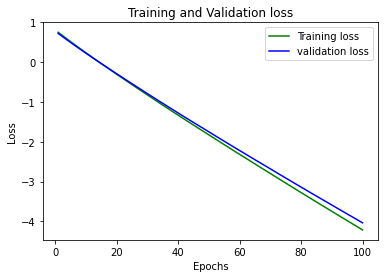

In [144]:
# Visualizing Training and Validation Loss

loss_train = ann_history.history['loss']
loss_val = ann_history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**OBSERVATIONS:

1.) We observe that it is an underfit model as we can see that from the learning curves of both training loss and validation loss.

2.) Underfit models usually show a flat line with relatively high loss.

3.) An underfit model may also be identified by a training loss that is decreasing and continues to decrease at the end of the plot.

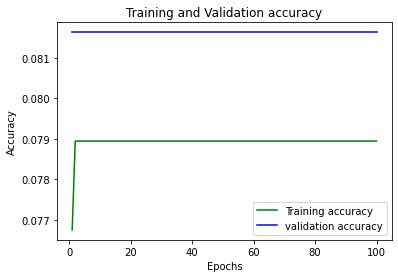

In [145]:
# Visualizing Training and Validation Accuracy

loss_train = ann_history.history['accuracy']
loss_val = ann_history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**OBSERVATIONS:

1.) When it comes to Accuracy, here the model is overfitting.

2.) The gap between training and validation accuracy is a clear indication of overfitting. The larger the gap, the higher the overfitting.


In [146]:
# Visualizing confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [147]:
# Predicting the Test set results
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
accuracy = accuracy_score(y_pred,y_test)

In [148]:
# To display Confusion matrix array
cm

array([[19,  0,  0,  0,  0,  0],
       [18,  0,  0,  0,  0,  0],
       [46,  0,  0,  0,  0,  0],
       [34,  0,  0,  0,  0,  0],
       [56,  0,  0,  0,  0,  0],
       [45,  0,  0,  0,  0,  0]], dtype=int64)

In [149]:
# Calculating the accuracy score of the model using confusion matrix
accuracy

0.0871559633027523

**OBSERVATIONS:

1.) Here the accuracy score of the ANN model using confusion matrix results in 87%.

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

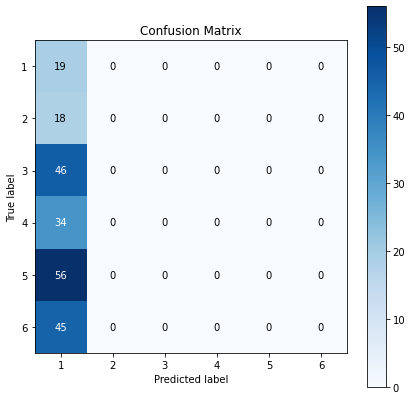

In [150]:
# Plotting the confusion matrix

import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(7,7))

**OBSERVATIONS:

1.) The confusion matrix compares the actual target values with that of the values predicted by the model.

2.) Here except for the first column, we can see zeroes in all other columns. This means the model is underfitting.

In [151]:
# To evaluate ANN using Keras Classifier

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [152]:
# Builing the function

def ann_classifier():
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    tf.keras.layers.Dropout(0.6)
    ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))
    ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
    return ann

In [153]:
# Passing values to KerasClassifier 

ann = KerasClassifier(build_fn = ann_classifier, batch_size = 32, epochs = 100)

In [154]:
# We are using 4 fold cross validation here

accuracies = cross_val_score(estimator = ann, X = x_train, y = y_train, cv = 4)

Epoch 1/100
16/16 [==============================] - 1s 1ms/step - loss: 0.7661 - accuracy: 0.0996 
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7191 - accuracy: 0.1050
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.1085
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6272 - accuracy: 0.1208
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5857 - accuracy: 0.1193
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5409 - accuracy: 0.1212
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.0906
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.0934
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.1137
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3679 - accuracy: 0.1125
Epoch 11

In [155]:
# Checking the mean and standard deviation of the accuracies obtained

mean = accuracies.mean()
std_deviation = accuracies.std()
print("Accuracy: {:.2f} %".format(mean*100))
print("Standard Deviation: {:.2f} %".format(std_deviation*100))

Accuracy: 10.89 %
Standard Deviation: 1.26 %


In [156]:
#Calculating the F1 score of the model

recall=(cm[0][0])/(cm[0][0]+cm[0][1])
precision=(cm[0][0])/(cm[0][0]+cm[1][0])
F1=(2*recall*precision)/(precision+recall)
print("F1 Score:"+str(F1))

F1 Score:0.6785714285714285


**OBSERVATIONS: 

1.) Here, the F1 score of the ANN model is 67%.

2.) Here, F1 score < Accuracy. This usually happens for an unbalanced data.

In [194]:
# Plotting loss function Vs Epochs

import matplotlib.pyplot as plt

plt.figure(figsize=[8,6])
plt.plot('access loss value from log file','r',linewidth=3.0)
plt.plot('access val_loss from log file','b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Loss Curves')